# Plotting Reflectivity Fits and Profiles

* **Date Created:** 2020-3-3
* **Date Modified:** 2020-3-4
* **Author:** Brian P. Josey
* **Language:** Python 3.8

In this notebook I am creating and testing functions to automatically load and plot reflectivity data, fits, and profiles from the Refl1D outputs. While that packages does it automatically, I am unhappy with the quality of the images; they come out as PNG, and the size of the data points tend to be so large that there is significant overlap between adjacent points.

**Goals:**

* Identify what data need to be plotted.
* Correctly load data into a dataframe.
* Plot the above in an aesthetically appealing plot.
* Save images in a publication quality PDF.
* Automate the process as **.py** script that can be ran from the terminal.
* Test with magnetic and non-magnetic data.

Ideally, I will also determine how to identify the name of the sample and use it in figure titles and file names.

In [7]:
# Essential libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Profiles and Reflectivity

By manually inspecting the **.dat** files, it became clear that the data is delimetered by whitespace which can vary in each row. This makes the files easily readable by a human, but if I want to upload it into a dataframe using panda's **read_csv( )** functiton I need to set **delim_whitespace = True**. This has an odd effect on the header where the column names do not match with the columns; whitespace between the column name and units create additional columns of NaNs that need to be discounted. To bypass this issue, I

* Manually inspected each **.dat** file to determine what column names actually match with which column.
* Load the data into a dataframe by discounting the columns of NaNs.
* Assign the column names to the correct data label.
* I started with the profile (3 columns) before moving to the reflectometry (6 columns).

Note: the names of the data are standard for reflectometry, if a little obscure to the someone outside of the field.

In [8]:
# Profile

profile = pd.read_csv('R1XR Silicon-SiOx-profile.dat', delim_whitespace=True, usecols = ['#','z','(A)'])
profile.columns = ['z','rho','irho']
print(profile)

              z        rho      irho
0     -33.31018  20.072940  0.462067
1     -33.21018  20.073028  0.462189
2     -33.11018  20.073119  0.462314
3     -33.01018  20.073212  0.462443
4     -32.91018  20.073308  0.462575
...         ...        ...       ...
2622  228.88982   0.259190  0.016260
2623  228.98982   0.237525  0.014901
2624  229.08982   0.217521  0.013646
2625  229.18982   0.199063  0.012488
2626  229.28982   0.182046  0.011421

[2627 rows x 3 columns]


In [9]:
# Reflectivity

refl = pd.read_csv('R1XR Silicon-SiOx-refl.dat', delim_whitespace=True, header = 2, usecols=[
    '#','Q','(1/A)','dQ', '(1/A).1', 'R'
    ])

refl.columns = ['Q','dQ','R','dR','theory','fresnel']
print(refl)

            Q        dQ             R            dR        theory  \
0    0.048364  0.000751  9.514346e-01  5.010035e-03  9.185497e-01   
1    0.049787  0.000751  9.404456e-01  4.966974e-03  9.148689e-01   
2    0.051209  0.000751  9.248359e-01  4.905727e-03  9.085837e-01   
3    0.052632  0.000751  9.150795e-01  4.867396e-03  9.011532e-01   
4    0.054054  0.000751  8.916430e-01  4.775170e-03  8.924725e-01   
..        ...       ...           ...           ...           ...   
368  0.778334  0.000777  6.195594e-09  6.168920e-09  6.087096e-09   
369  0.781166  0.000778  5.519778e-09  6.187505e-09  5.579134e-09   
370  0.783998  0.000778 -4.483326e-09  5.966852e-09  4.655729e-09   
371  0.786830  0.000778 -3.221620e-09  5.954848e-09  3.504905e-09   
372  0.789661  0.000778  9.079601e-09  6.148678e-09  2.577275e-09   

          fresnel  
0    1.886262e-02  
1    1.722882e-02  
2    1.498312e-02  
3    1.303783e-02  
4    1.141158e-02  
..            ...  
368  1.771692e-07  
369  1.7461

## Plotting the Data

Now that I have the data, I want to plot it. For the profiles, I want to plot both **rho** and **irho** as functions of **z** on the same plot with linear axes. For reflectometry, I need **R**, **dR**, and the fit all as functions of **Q** on a semilog (y-axis) plot.

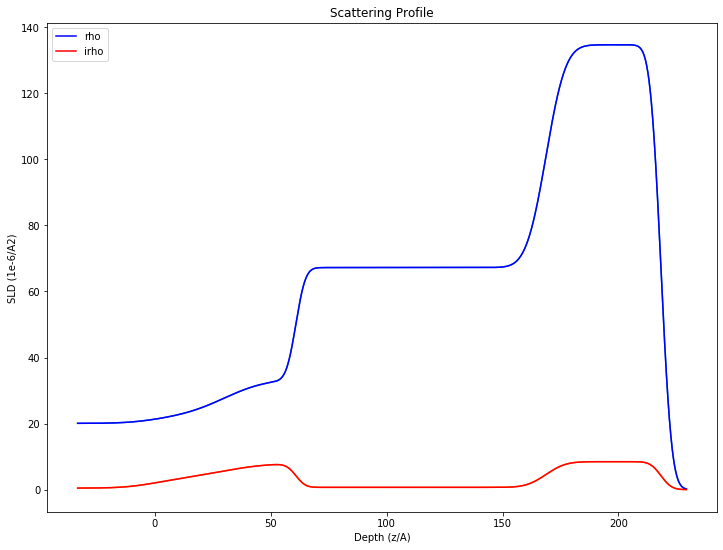

In [80]:
# Fitted Profile

fig, ax = plt.subplots()
ax.plot(profile.z, profile.rho, profile.z, profile.irho)
plt.rcParams["figure.figsize"] = (12, 9)

ax.set(xlabel = 'Depth (z/A)', ylabel = 'SLD (1e-6/A2)', title = 'Scattering Profile')

plt.plot(profile.z, profile.rho, "-b", label="rho")
plt.plot(profile.z, profile.irho, "-r", label="irho")
plt.legend(loc="upper left")


plt.show()
fig.savefig("Profile.pdf")

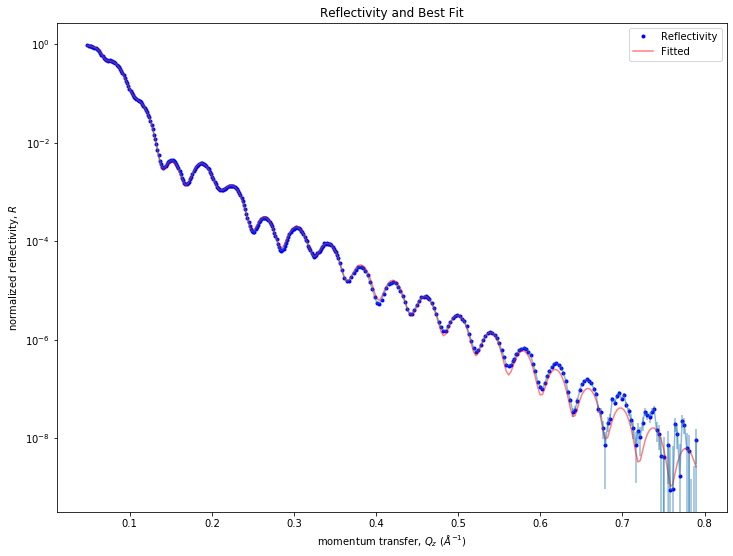

In [85]:
# Plotting Reflectometry
fig, ax = plt.subplots()

plt.plot(refl.Q, refl.R, ".b", label = "Reflectivity", alpha = 1)
plt.plot(refl.Q, refl.theory, "-r", label = "Fitted", alpha = 0.5)
plt.legend(loc="upper right")

ax.errorbar(refl.Q, refl.R, yerr=refl.dR, fmt='-', alpha =0.5)
ax.set(xlabel=r"momentum transfer, $Q_{z}\ (Å^{-1})$", ylabel=r"normalized reflectivity, $R$",
       title="Reflectivity and Best Fit")
ax.semilogy()

plt.show()
fig.savefig("Reflectivity.pdf")